In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
s=pd.read_csv(r"C:\Users\RANID\OneDrive\Documents\machine learning\healthcare-dataset-stroke-data.csv")
s.head()
#s.tail(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.Each row in the data provides relavant information about the patient.

In [3]:
s.shape

(5110, 12)

# DATA CLEANING

# 1.Missing Values Treatment

In [4]:
s.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Numeric columns can be imputed with both mean and median but mean get highly affected by outliers so median is better option.

Imputing bmi with median because it is numeric column

In [5]:
s["bmi"]=s["bmi"].fillna(s["bmi"].median())
#s.isnull().sum()

# 2. Dtype conversion

Dtype conversion done by the label Encoder

In [6]:
s.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
s.gender.value_counts()
s.gender=le.fit_transform(s.gender)
s.gender.value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [9]:
s.ever_married.value_counts()
s.ever_married=le.fit_transform(s.ever_married)
s.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [10]:
s.work_type.value_counts()
s.work_type=le.fit_transform(s.work_type)
s.work_type.value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [11]:
s.Residence_type.value_counts()
s.Residence_type=le.fit_transform(s.Residence_type)
s.Residence_type.value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [12]:
s.smoking_status.value_counts()
s.smoking_status=le.fit_transform(s.smoking_status)
s.smoking_status.value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [13]:
s.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

# 3.Dropping the Unique Columns

In [14]:
#Id is an unique column so we have to drop it
e = s["id"]
s=s.drop(["id"],axis=1)
s.shape

(5110, 11)

# checking the value count of target variable

In [15]:
s.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# BASE MODEL

In [16]:
s_x=s.iloc[:,:-1]
s_y=s.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
s_xtrain,s_xtest,s_ytrain,s_ytest=train_test_split(s_x,s_y,train_size=0.8,random_state=29)
s_xtrain.shape,s_xtest.shape,s_ytrain.shape,s_ytest.shape

((4088, 10), (1022, 10), (4088,), (1022,))

# 1.Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(s_xtrain,s_ytrain)
p=lg.predict(s_xtest)
p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
m1=confusion_matrix(p,s_ytest)
acc=m1.diagonal().sum()/m1.sum()*100
m1,acc

(array([[966,  56],
        [  0,   0]], dtype=int64),
 94.52054794520548)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(p,s_ytest))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.47      0.49      1022
weighted avg       1.00      0.95      0.97      1022



In [21]:
lg_pre_score= precision_score(s_ytest,p)
lg_re_score= recall_score(s_ytest,p)
lg_f1_score= f1_score(s_ytest,p)
lg_pre_score,lg_re_score,lg_f1_score

(0.0, 0.0, 0.0)

# 2.Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(s_xtrain,s_ytrain)
dt_p=dt.predict(s_xtest)
dt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
dt.feature_importances_

array([0.03893176, 0.22225994, 0.02858754, 0.0158407 , 0.01267979,
       0.03952125, 0.01767378, 0.3643503 , 0.20758287, 0.05257206])

In [24]:
dt_cf=confusion_matrix(dt_p,s_ytest)
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_cf,dt_acc

(array([[914,  48],
        [ 52,   8]], dtype=int64),
 90.21526418786692)

In [25]:
print(classification_report(dt_p,s_ytest))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       962
           1       0.14      0.13      0.14        60

    accuracy                           0.90      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.90      0.90      0.90      1022



In [26]:
dt_pre_score= precision_score(s_ytest,dt_p)
dt_re_score= recall_score(s_ytest,dt_p)
dt_f1_score= f1_score(s_ytest,dt_p)
dt_pre_score,dt_re_score,dt_f1_score

(0.13333333333333333, 0.14285714285714285, 0.1379310344827586)

# 3.Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(s_xtrain,s_ytrain)
rf_p=rf.predict(s_xtest)
rf_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
rf_cf=confusion_matrix(rf_p,s_ytest)
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_cf,rf_acc

(array([[964,  56],
        [  2,   0]], dtype=int64),
 94.32485322896281)

In [29]:
print(classification_report(rf_p,s_ytest))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1020
           1       0.00      0.00      0.00         2

    accuracy                           0.94      1022
   macro avg       0.50      0.47      0.49      1022
weighted avg       1.00      0.94      0.97      1022



In [30]:
rf_pre_score= precision_score(s_ytest,rf_p)
rf_re_score= recall_score(s_ytest,rf_p)
rf_f1_score= f1_score(s_ytest,rf_p)
rf_pre_score,rf_re_score,rf_f1_score

(0.0, 0.0, 0.0)

# 4.KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(s_xtrain,s_ytrain)
knn_p=knn.predict(s_xtest)
knn_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
knn_cf=confusion_matrix(knn_p,s_ytest)
knn_acc=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_cf,knn_acc

(array([[966,  56],
        [  0,   0]], dtype=int64),
 94.52054794520548)

In [33]:
print(classification_report(knn_p,s_ytest))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.47      0.49      1022
weighted avg       1.00      0.95      0.97      1022



In [34]:
knn_pre_score= precision_score(s_ytest,knn_p)
knn_re_score= recall_score(s_ytest,knn_p)
knn_f1_score= f1_score(s_ytest,knn_p)
knn_pre_score,knn_re_score,knn_f1_score

(0.0, 0.0, 0.0)

# 5.SVM

In [35]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(s_xtrain,s_ytrain)
sp=svc.predict(s_xtest)
sp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
svc_m=confusion_matrix(sp,s_ytest)
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_m,svc_acc

(array([[966,  56],
        [  0,   0]], dtype=int64),
 94.52054794520548)

In [37]:
print(classification_report(sp,s_ytest))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.47      0.49      1022
weighted avg       1.00      0.95      0.97      1022



In [38]:
svm_pre_score= precision_score(s_ytest,sp)
svm_re_score= recall_score(s_ytest,sp)
svm_f1_score= f1_score(s_ytest,sp)
svm_pre_score,svm_re_score,svm_f1_score

(0.0, 0.0, 0.0)

# 6.NB

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(s_xtrain,s_ytrain)
nb_p=nb.predict(s_xtest)
nb_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
nb_m=confusion_matrix(nb_p,s_ytest)
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_m,nb_acc

(array([[810,  26],
        [156,  30]], dtype=int64),
 82.1917808219178)

In [41]:
print(classification_report(s_ytest,nb_p))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       966
           1       0.16      0.54      0.25        56

    accuracy                           0.82      1022
   macro avg       0.57      0.69      0.57      1022
weighted avg       0.92      0.82      0.86      1022



In [42]:
nb_pre_score= precision_score(s_ytest,nb_p)
nb_re_score= recall_score(s_ytest,nb_p)
nb_f1_score= f1_score(s_ytest,nb_p)
nb_pre_score,nb_re_score,nb_f1_score

(0.16129032258064516, 0.5357142857142857, 0.24793388429752067)

# 7. XGB

In [43]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(s_xtrain,s_ytrain)
xgb_p=xgb.predict(s_xtest)
xgb_p

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
xgb_m=confusion_matrix(xgb_p,s_ytest)
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_m,xgb_acc

(array([[962,  56],
        [  4,   0]], dtype=int64),
 94.12915851272015)

In [45]:
print(classification_report(xgb_p,s_ytest))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1018
           1       0.00      0.00      0.00         4

    accuracy                           0.94      1022
   macro avg       0.50      0.47      0.48      1022
weighted avg       0.99      0.94      0.97      1022



In [46]:
xgb_pre_score= precision_score(s_ytest,xgb_p)
xgb_re_score= recall_score(s_ytest,xgb_p)
xgb_f1_score= f1_score(s_ytest,xgb_p)
xgb_pre_score,xgb_re_score,xgb_f1_score

(0.0, 0.0, 0.0)

# BASEMODEL DATAFRAME

In [47]:
list1=["LG","DT","RF","KNN","SVM","NB","XGB"]
list2=[acc,dt_acc,rf_acc,knn_acc,svc_acc,nb_acc,xgb_acc]
list3=[lg_pre_score,dt_pre_score,rf_pre_score,knn_pre_score,svm_pre_score,nb_pre_score,xgb_pre_score]
list4=[lg_re_score,dt_re_score,rf_re_score,knn_re_score,svm_re_score,nb_re_score,xgb_re_score]
list5=[lg_f1_score,dt_f1_score,rf_f1_score,knn_f1_score,svm_f1_score,nb_f1_score,xgb_f1_score]

In [48]:
Basemodel_final= pd.DataFrame({"basemodel name":list1,"accuracy":list2,"precision":list3,"recall":list4,"f1score":list5})
Basemodel_final

,basemodel name,accuracy,precision,recall,f1score
0,LG,94.520548,0.000000,0.000000,0.000000
1,DT,90.215264,0.133333,0.142857,0.137931
2,RF,94.324853,0.000000,0.000000,0.000000
3,KNN,94.520548,0.000000,0.000000,0.000000
4,SVM,94.520548,0.000000,0.000000,0.000000
5,NB,82.191781,0.161290,0.535714,0.247934
6,XGB,94.129159,0.000000,0.000000,0.000000


# BASEMODEL CONCLUSION: 
   Out of these models,NaiveBayes is better compared to others though every models are having low precision,recall and f1 score
This is due to the Class Imbalance problem in this Dataset.

# CLASS  IMBALANCE

In [49]:
r=s.stroke.value_counts()
r

0    4861
1     249
Name: stroke, dtype: int64

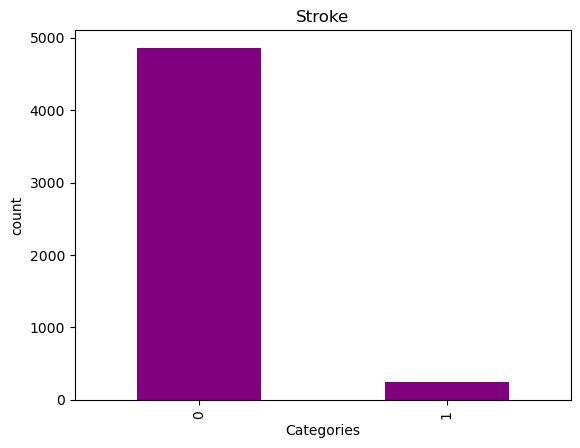

In [50]:
r.plot(kind="bar",color="purple")
plt.xlabel("Categories")
plt.ylabel("count")
plt.title("Stroke")
plt.show()

# SMOTE - Synthetic Minority Oversampling Technique

In [51]:
sx=s.iloc[:,0:-1]
sy=s.iloc[:,-1]
sx.shape,sy.shape

((5110, 10), (5110,))

In [52]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(sx,sy)

In [53]:
x_smote.shape,y_smote.shape

((9722, 10), (9722,))

In [54]:
y_smote.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

# Exploratory Data Analysis 

# 1.OUTLIER TREATMENT

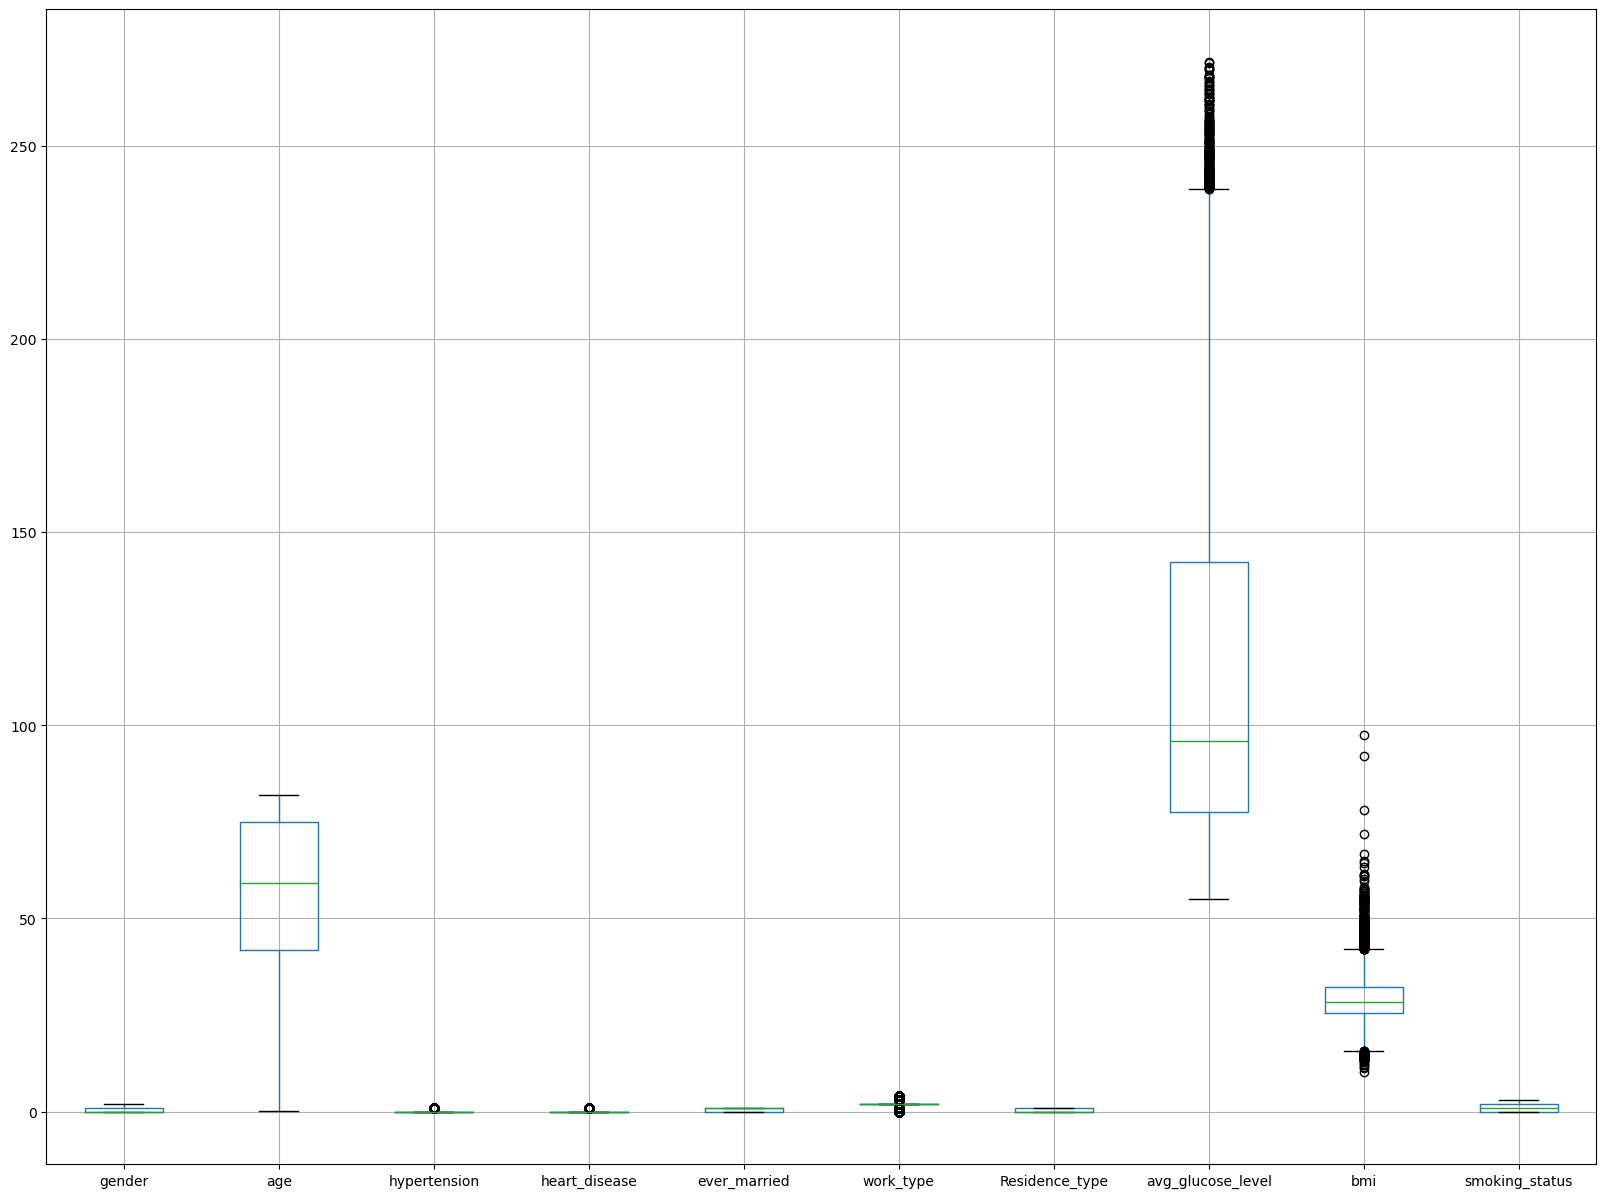

In [55]:
x_smote.boxplot(figsize=(20,15))
plt.show()

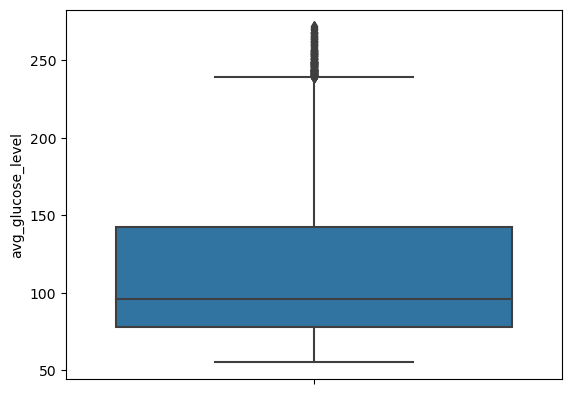

In [56]:
sns.boxplot(data=x_smote,y="avg_glucose_level")
plt.show()

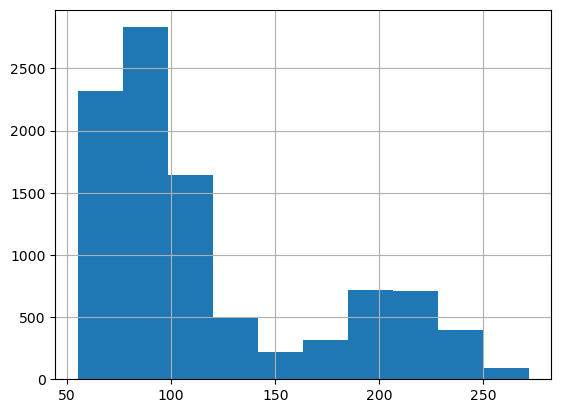

In [57]:
x_smote.avg_glucose_level.hist()
plt.show()

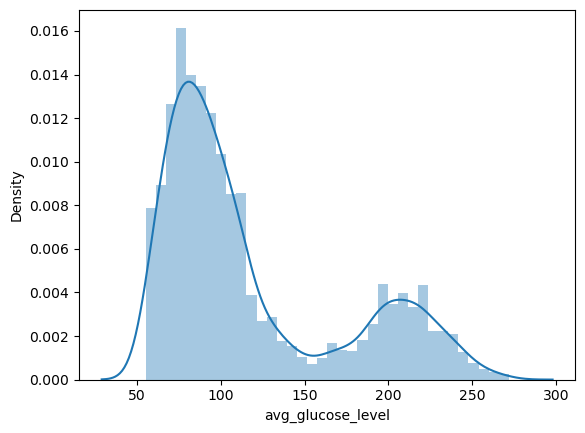

In [58]:
sns.distplot(x_smote["avg_glucose_level"])
plt.show()

In [59]:
x_smote["avg_glucose_level"].describe()

count    9722.000000
mean      117.645672
std        54.669898
min        55.120000
25%        77.671550
50%        95.998227
75%       142.120000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [60]:
up=x_smote["avg_glucose_level"].mean()+ 3 *x_smote["avg_glucose_level"].std()
low=x_smote["avg_glucose_level"].mean()-3 *x_smote["avg_glucose_level"].std()
print(up)
print(low)

281.65536596973243
-46.364022502529295


In [61]:
x_smote.loc[x_smote["avg_glucose_level"] >283,"age"]= 283

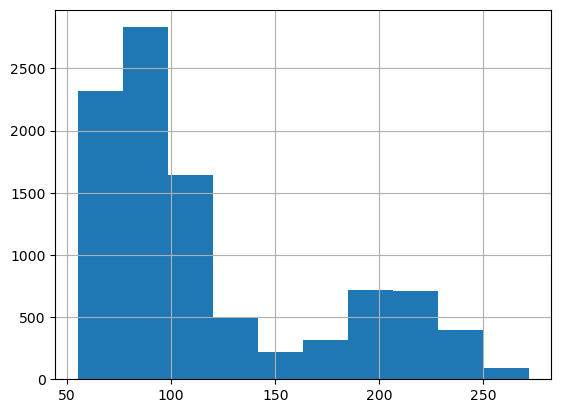

In [62]:
x_smote.avg_glucose_level.hist()
plt.show()

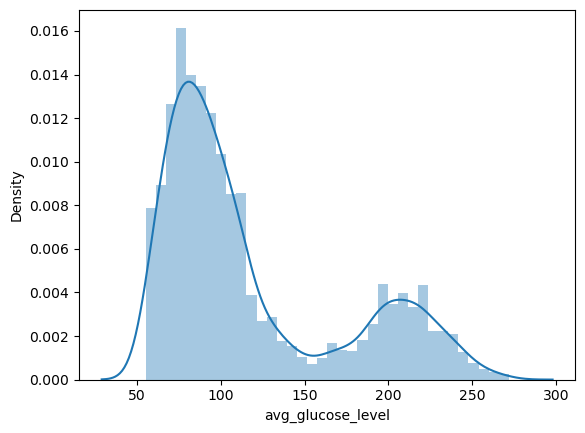

In [63]:
sns.distplot(x_smote["avg_glucose_level"])
plt.show()

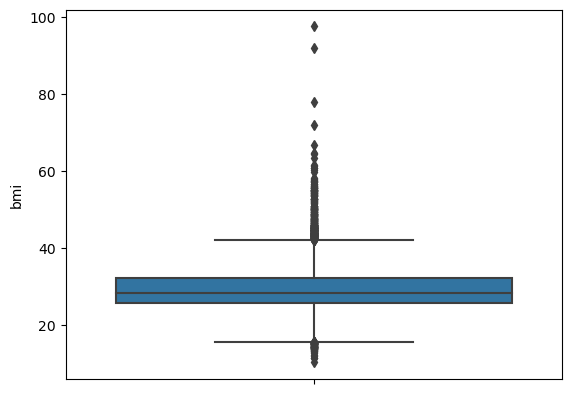

In [64]:
sns.boxplot(data=x_smote,y="bmi")
plt.show()

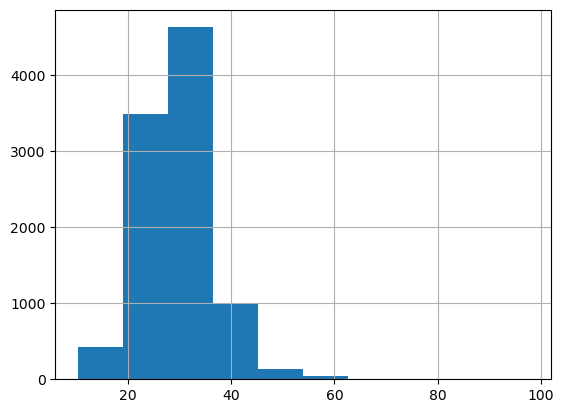

In [65]:
x_smote.bmi.hist()
plt.show()

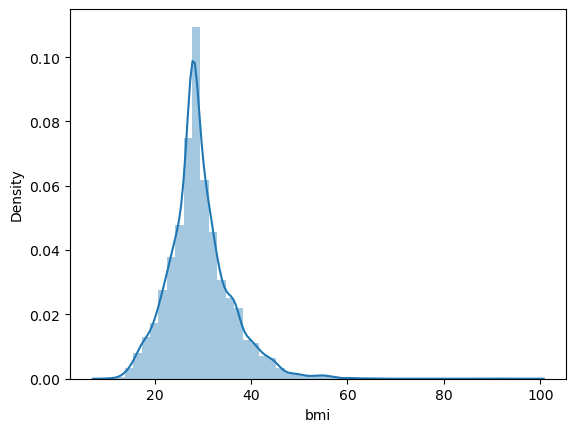

In [66]:
sns.distplot(x_smote["bmi"])
plt.show()

In [67]:
x_smote.bmi.describe()

count    9722.000000
mean       29.268560
std         6.512720
min        10.300000
25%        25.600000
50%        28.300000
75%        32.202962
max        97.600000
Name: bmi, dtype: float64

In [68]:
IQR = x_smote["bmi"].quantile(0.75)-x_smote["bmi"].quantile(0.25)
IQR

6.6029617344342455

In [69]:
lb=x_smote["bmi"].quantile(0.25)-(IQR*3)
ub=x_smote["bmi"].quantile(0.75)+(IQR*3)
lb,ub

(5.791114796697265, 52.01184693773698)

In [70]:
x_smote.loc[x_smote["bmi"]>52.4,"bmi"]=52.4
x_smote.loc[x_smote["bmi"]< 5.40,"bmi"]= 5.40

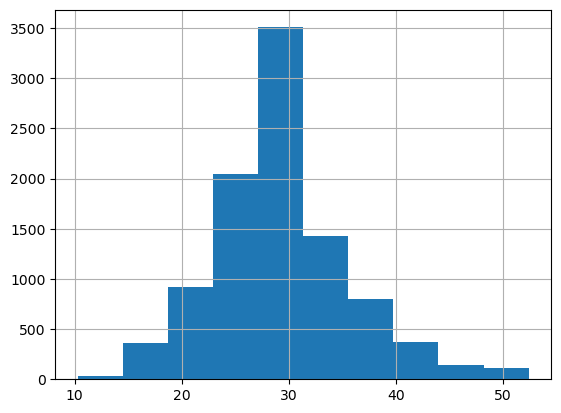

In [71]:
x_smote.bmi.hist()
plt.show()

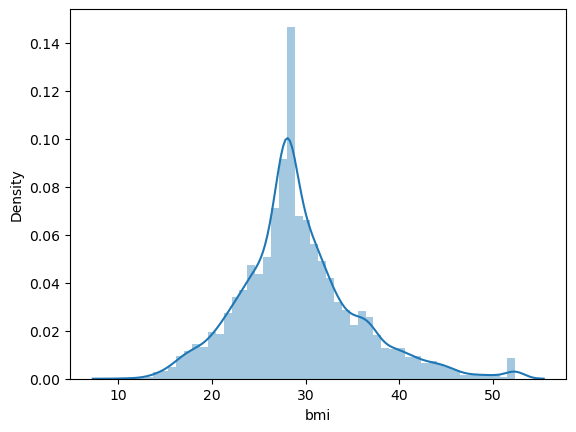

In [72]:
sns.distplot(x_smote["bmi"])
plt.show()

# 2.SKEWNESS TREATMENT

In [73]:
x_smote.skew()

gender               0.746197
age                 -0.780500
hypertension         2.960994
heart_disease        4.336293
ever_married        -0.968308
work_type           -0.264132
Residence_type       0.374266
avg_glucose_level    1.046298
bmi                  0.694462
smoking_status       0.083975
dtype: float64

The values are between -1 and 1 so,we don't have to treat skewness.

# 3.VISUALIZATION

In [74]:
w=pd.concat([x_smote,y_smote],axis=1)
w.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1


# Correlation

In [75]:
ss = w.corr()   
ss.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.128341,0.007492,0.087288,-0.012755,0.087933,0.043436,0.039795,-0.010386,-0.020237,-0.186453
age,-0.128341,1.000000,0.148080,0.139071,0.466556,-0.312735,-0.107604,0.264267,0.198868,0.079251,0.592466
hypertension,0.007492,0.148080,1.000000,0.046850,0.105359,0.014727,-0.043295,0.105956,0.114181,0.106672,-0.011392


# HeatMap - Correlation Plot

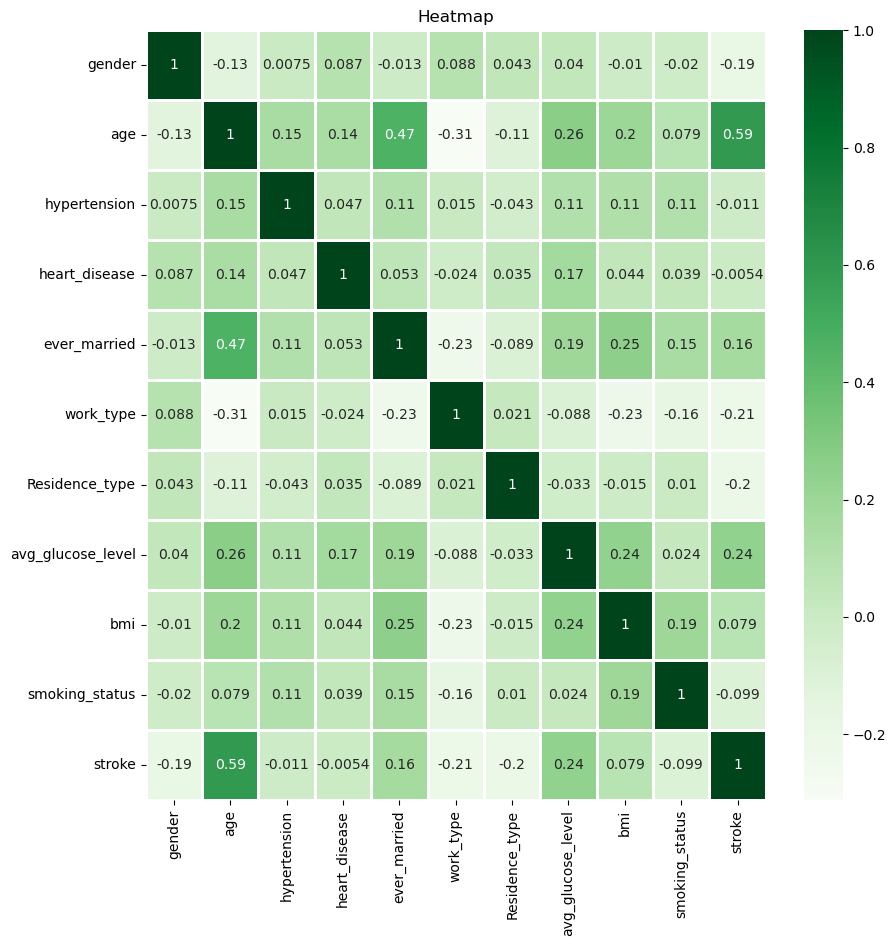

In [76]:
plt.figure(figsize = (10,10))
custom_palette=sns.color_palette("Greens",as_cmap=True)
heatmap = sns.heatmap(ss,linewidth = 1,annot = True,cmap = custom_palette)
plt.title("Heatmap")
plt.show()

# Relational Plot
Graph of having stroke or not, based on age,bmi, and smoking status. 
never smoked     -2,           
Unknown          -0,
formerly smoked  -1,
smokes           -3,

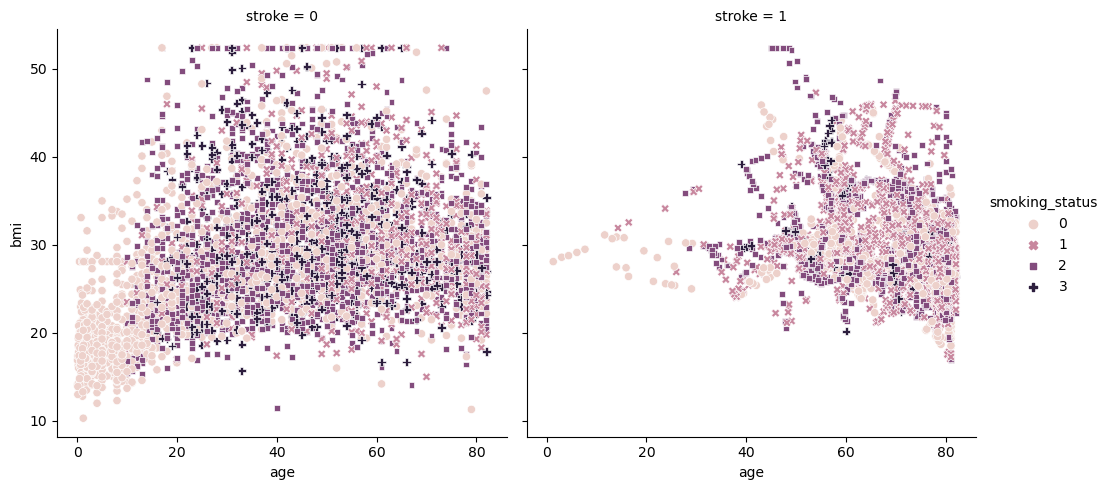

In [77]:
sns.relplot(data=w,x="age",y="bmi",col="stroke",hue="smoking_status",style="smoking_status")
plt.show()

# Distribution Plot

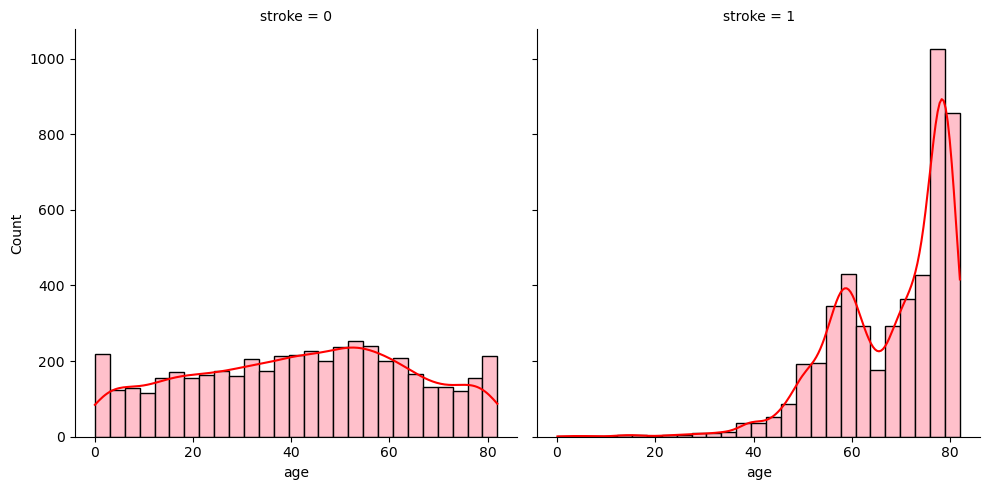

In [78]:
sns.displot(data=w, x="age", col="stroke",kde=True,color="red",facecolor="pink",edgecolor="black")
plt.show()

# Histogram Plot

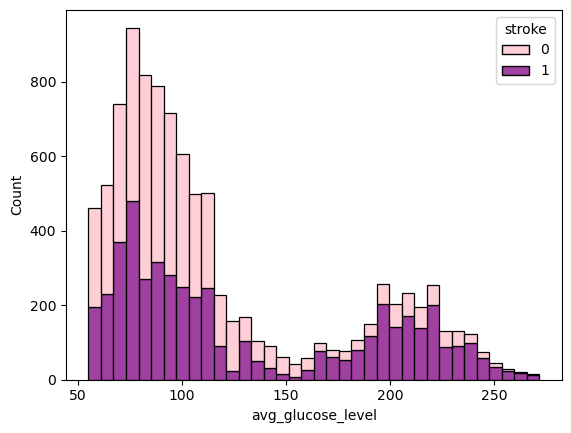

In [79]:
custom_palette={"purple","pink"}
sns.histplot(data=w,x="avg_glucose_level",hue="stroke",multiple="stack",palette=custom_palette)
plt.show()

# Kernel Distribution plot

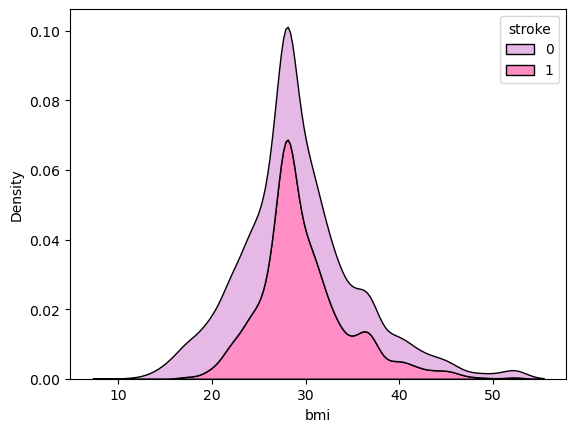

In [80]:
c_p={"plum","hotpink"}
sns.kdeplot(data=w,x="bmi",hue="stroke",multiple="stack",palette=c_p)
plt.show()

# SPLITTING OF DATA

In [81]:
xs_tr,xs_te,ys_tr,ys_te=train_test_split(x_smote,y_smote,test_size=0.2,random_state=100)

In [82]:
xs_tr.shape,xs_te.shape,ys_tr.shape,ys_te.shape

((7777, 10), (1945, 10), (7777,), (1945,))

# 1.Logistic Regression

In [83]:
lg.fit(xs_tr,ys_tr)
sm_p1=lg.predict(xs_te)
sm_p1

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [84]:
sm_cf1=confusion_matrix(sm_p1,ys_te)
lg_acc3=sm_cf1.diagonal().sum()/sm_cf1.sum()*100
sm_cf1,lg_acc3

(array([[767, 185],
        [210, 783]], dtype=int64),
 79.69151670951156)

In [85]:
print(classification_report(sm_p1,ys_te))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       952
           1       0.81      0.79      0.80       993

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945



In [86]:
sm_lg_pre_score= precision_score(ys_te,sm_p1)
sm_lg_re_score= recall_score(ys_te,sm_p1)
sm_lg_f1_score= f1_score(ys_te,sm_p1)
sm_lg_pre_score,sm_lg_re_score,sm_lg_f1_score

(0.7885196374622356, 0.8088842975206612, 0.798572157062723)

# 2.Dt

In [87]:
dt.fit(xs_tr,ys_tr)
sm_p2=dt.predict(xs_te)
sm_p2

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [88]:
dt.feature_importances_

array([0.0246    , 0.4954602 , 0.01269162, 0.01270235, 0.02644666,
       0.06107275, 0.0193308 , 0.17927374, 0.13644103, 0.03198084])

In [89]:
sm_cf2=confusion_matrix(sm_p2,ys_te)
dt_acc3=sm_cf2.diagonal().sum()/sm_cf2.sum()*100
sm_cf2,dt_acc3

(array([[883,  82],
        [ 94, 886]], dtype=int64),
 90.95115681233933)

In [90]:
print(classification_report(sm_p2,ys_te))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       965
           1       0.92      0.90      0.91       980

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



In [91]:
sm_dt_pre_score= precision_score(ys_te,sm_p2)
sm_dt_re_score= recall_score(ys_te,sm_p2)
sm_dt_f1_score= f1_score(ys_te,sm_p2)
sm_dt_pre_score,sm_dt_re_score,sm_dt_f1_score

(0.9040816326530612, 0.9152892561983471, 0.9096509240246407)

# 3.Rf

In [92]:
rf.fit(xs_tr,ys_tr)
sm_p3=rf.predict(xs_te)
sm_p3

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [93]:
rf.feature_importances_

array([0.02718884, 0.42550848, 0.01525364, 0.01227557, 0.0203143 ,
       0.07750359, 0.02838456, 0.17891123, 0.16011172, 0.05454806])

In [94]:
sm_cf3=confusion_matrix(sm_p3,ys_te)
rf_acc3=sm_cf3.diagonal().sum()/sm_cf3.sum()*100
sm_cf3,rf_acc3

(array([[905,  37],
        [ 72, 931]], dtype=int64),
 94.39588688946016)

In [95]:
print(classification_report(sm_p3,ys_te))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       942
           1       0.96      0.93      0.94      1003

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



In [96]:
sm_rf_pre_score= precision_score(ys_te,sm_p3)
sm_rf_re_score= recall_score(ys_te,sm_p3)
sm_rf_f1_score= f1_score(ys_te,sm_p3)
sm_rf_pre_score,sm_rf_re_score,sm_rf_f1_score

(0.9282153539381854, 0.9617768595041323, 0.9446981227803146)

# 4.SVM

In [97]:
svc.fit(xs_tr,ys_tr)
sm_p4=svc.predict(xs_te)
sm_p4

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [98]:
svc_cf8=confusion_matrix(sm_p4,ys_te)
svc_acc3=svc_cf8.diagonal().sum()/svc_cf8.sum()*100
svc_cf8,svc_acc3

(array([[685, 160],
        [292, 808]], dtype=int64),
 76.76092544987146)

In [99]:
print(classification_report(sm_p4,ys_te))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       845
           1       0.83      0.73      0.78      1100

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.78      0.77      0.77      1945



In [100]:
sm_svm_pre_score= precision_score(ys_te,sm_p4)
sm_svm_re_score= recall_score(ys_te,sm_p4)
sm_svm_f1_score= f1_score(ys_te,sm_p4)
sm_svm_pre_score,sm_svm_re_score,sm_svm_f1_score

(0.7345454545454545, 0.8347107438016529, 0.781431334622824)

# 5.KNN

In [101]:
knn.fit(xs_tr,ys_tr)
sm_p5=knn.predict(xs_te)
sm_p5

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [102]:
knn_cf8=confusion_matrix(sm_p5,ys_te)
knn_acc3=knn_cf8.diagonal().sum()/knn_cf8.sum()*100
knn_cf8,knn_acc3

(array([[717,  21],
        [260, 947]], dtype=int64),
 85.55269922879177)

In [103]:
print(classification_report(sm_p5,ys_te))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84       738
           1       0.98      0.78      0.87      1207

    accuracy                           0.86      1945
   macro avg       0.86      0.88      0.85      1945
weighted avg       0.89      0.86      0.86      1945



In [104]:
sm_knn_pre_score= precision_score(ys_te,sm_p5)
sm_knn_re_score= recall_score(ys_te,sm_p5)
sm_knn_f1_score= f1_score(ys_te,sm_p5)
sm_knn_pre_score,sm_knn_re_score,sm_knn_f1_score

(0.7845898922949461, 0.9783057851239669, 0.8708045977011494)

# 6.NB

In [105]:
nb.fit(xs_tr,ys_tr)
sm_p6=nb.predict(xs_te)
sm_p6

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [106]:
nb_cf8=confusion_matrix(sm_p6,ys_te)
nb_acc3=nb_cf8.diagonal().sum()/nb_cf8.sum()*100
nb_cf8,nb_acc3

(array([[670, 223],
        [307, 745]], dtype=int64),
 72.75064267352185)

In [107]:
print(classification_report(sm_p6,ys_te))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       893
           1       0.77      0.71      0.74      1052

    accuracy                           0.73      1945
   macro avg       0.73      0.73      0.73      1945
weighted avg       0.73      0.73      0.73      1945



In [108]:
sm_nb_pre_score= precision_score(ys_te,sm_p6)
sm_nb_re_score= recall_score(ys_te,sm_p6)
sm_nb_f1_score= f1_score(ys_te,sm_p6)
sm_nb_pre_score,sm_nb_re_score,sm_nb_f1_score

(0.7081749049429658, 0.7696280991735537, 0.7376237623762376)

# 7.Xgb

In [109]:
xgb.fit(xs_tr,ys_tr)
sm_p7=xgb.predict(xs_te)
sm_p7

array([0, 0, 1, ..., 0, 0, 0])

In [110]:
xgb_cf8=confusion_matrix(sm_p7,ys_te)
xgb_acc3=xgb_cf8.diagonal().sum()/xgb_cf8.sum()*100
xgb_cf8,xgb_acc3

(array([[929,  35],
        [ 48, 933]], dtype=int64),
 95.73264781491002)

In [111]:
print(classification_report(sm_p7,ys_te))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       964
           1       0.96      0.95      0.96       981

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



In [112]:
sm_xgb_pre_score= precision_score(ys_te,sm_p7)
sm_xgb_re_score= recall_score(ys_te,sm_p7)
sm_xgb_f1_score= f1_score(ys_te,sm_p7)
sm_xgb_pre_score,sm_xgb_re_score,sm_xgb_f1_score

(0.9510703363914373, 0.9638429752066116, 0.957414058491534)

# Smote DataFrame

In [113]:
list6=["LG","DT","RF","SVM","KNN","NB","XGB"]
list7=[lg_acc3,dt_acc3,rf_acc3,svc_acc3,knn_acc3,nb_acc3,xgb_acc3]
list8=[sm_lg_pre_score,sm_dt_pre_score,sm_rf_pre_score,sm_svm_pre_score,sm_knn_pre_score,sm_nb_pre_score,sm_xgb_pre_score]
list9=[sm_lg_re_score,sm_dt_re_score,sm_rf_re_score,sm_svm_re_score,sm_knn_re_score,sm_nb_re_score,sm_xgb_re_score]
list10=[sm_lg_f1_score,sm_dt_f1_score,sm_rf_f1_score,sm_svm_f1_score,sm_knn_f1_score,sm_nb_f1_score,sm_xgb_f1_score]

In [114]:
smote_final= pd.DataFrame({"smote_model name":list6,"accuracy":list7,"precision":list8,"recall":list9,"f1score":list10})
smote_final

,smote_model name,accuracy,precision,recall,f1score
0,LG,79.691517,0.788520,0.808884,0.798572
1,DT,90.951157,0.904082,0.915289,0.909651
2,RF,94.395887,0.928215,0.961777,0.944698
3,SVM,76.760925,0.734545,0.834711,0.781431
4,KNN,85.552699,0.784590,0.978306,0.870805
5,NB,72.750643,0.708175,0.769628,0.737624
6,XGB,95.732648,0.951070,0.963843,0.957414


# SMOTE MODELS CONCLUSION:
 Out of these models,after treating class imbalance with smote oversampling XGBoost is better with good accuracy,precision,recall and f1 score compared to others.

# FEATURE SELECTION 

# Using  Random Forest

In [115]:
df=pd.DataFrame({"importances":list(rf.feature_importances_),"columns":list(x_smote)})
df

,importances,columns
0,0.027189,gender
1,0.425508,age
2,0.015254,hypertension
3,0.012276,heart_disease
4,0.020314,ever_married
5,0.077504,work_type
6,0.028385,Residence_type
7,0.178911,avg_glucose_level
8,0.160112,bmi
9,0.054548,smoking_status


In [116]:
newx=x_smote.drop(["gender","hypertension","heart_disease","ever_married","Residence_type"],axis=1)
newx.head(2)

,age,work_type,avg_glucose_level,bmi,smoking_status
0,67.0,2,228.69,36.6,1
1,61.0,3,202.21,28.1,2


In [117]:
y_smote.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [118]:
newx.shape,y_smote.shape

((9722, 5), (9722,))

In [119]:
nsx_train,nsx_test,nsy_train,nsy_test=train_test_split(newx,y_smote,test_size=0.2,random_state=43)

In [120]:
nsx_train.shape,nsx_test.shape,nsy_train.shape,nsy_test.shape

((7777, 5), (1945, 5), (7777,), (1945,))

# 1.Logistic Regression

In [121]:
lg.fit(nsx_train,nsy_train)
lg_pred = lg.predict(nsx_test)
lg_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [122]:
fs_lg_cm= confusion_matrix(lg_pred,nsy_test)
fs_lg_acc=fs_lg_cm.diagonal().sum()/fs_lg_cm.sum()*100
fs_lg_cm,fs_lg_acc

(array([[736, 168],
        [270, 771]], dtype=int64),
 77.48071979434448)

In [123]:
print(classification_report(lg_pred,nsy_test))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       904
           1       0.82      0.74      0.78      1041

    accuracy                           0.77      1945
   macro avg       0.78      0.78      0.77      1945
weighted avg       0.78      0.77      0.78      1945



In [124]:
fs_lg_pre_score= precision_score(nsy_test,lg_pred)
fs_lg_re_score= recall_score(nsy_test,lg_pred)
fs_lg_f1_score= f1_score(nsy_test,lg_pred)
fs_lg_pre_score,fs_lg_re_score,fs_lg_f1_score

(0.7406340057636888, 0.8210862619808307, 0.7787878787878788)

# 2.DT

In [125]:
dt.fit(nsx_train,nsy_train)
dt_pred = dt.predict(nsx_test)
dt_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [126]:
fs_dt_cm=confusion_matrix(dt_pred,nsy_test)
fs_dt_acc=fs_dt_cm.diagonal().sum()/fs_dt_cm.sum()*100
fs_dt_cm,fs_dt_acc

(array([[893,  65],
        [113, 874]], dtype=int64),
 90.8483290488432)

In [127]:
print(classification_report(dt_pred,nsy_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       958
           1       0.93      0.89      0.91       987

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



In [128]:
fs_dt_pre_score= precision_score(nsy_test,dt_pred)
fs_dt_re_score= recall_score(nsy_test,dt_pred)
fs_dt_f1_score= f1_score(nsy_test,dt_pred)
fs_dt_pre_score,fs_dt_re_score,fs_dt_f1_score

(0.8855116514690983, 0.9307774227902024, 0.9075804776739356)

# 3.RF

In [129]:
rf.fit(nsx_train,nsy_train)
rf_pred = rf.predict(nsx_test)
rf_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [130]:
fs_rf_cm = confusion_matrix(rf_pred,nsy_test)
fs_rf_acc=fs_rf_cm.diagonal().sum()/fs_rf_cm.sum()*100
fs_rf_cm,fs_rf_acc

(array([[910,  37],
        [ 96, 902]], dtype=int64),
 93.16195372750643)

In [131]:
print(classification_report(rf_pred,nsy_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       947
           1       0.96      0.90      0.93       998

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



In [132]:
fs_rf_pre_score= precision_score(nsy_test,rf_pred)
fs_rf_re_score= recall_score(nsy_test,rf_pred)
fs_rf_f1_score= f1_score(nsy_test,rf_pred)
fs_rf_pre_score,fs_rf_re_score,fs_rf_f1_score

(0.9038076152304609, 0.9605963791267306, 0.9313371192565824)

# 4.Xgb

In [133]:
xgb.fit(nsx_train,nsy_train)
xgb_pred = xgb.predict(nsx_test)
xgb_pred

array([0, 1, 0, ..., 0, 1, 0])

In [134]:
fs_xgb_cm = confusion_matrix(xgb_pred,nsy_test)
fs_xgb_acc=fs_xgb_cm.diagonal().sum()/fs_xgb_cm.sum()*100
fs_xgb_cm,fs_xgb_acc

(array([[958,  40],
        [ 48, 899]], dtype=int64),
 95.47557840616967)

In [135]:
print(classification_report(xgb_pred,nsy_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       998
           1       0.96      0.95      0.95       947

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [136]:
fs_xgb_pre_score= precision_score(nsy_test,xgb_pred)
fs_xgb_re_score= recall_score(nsy_test,xgb_pred)
fs_xgb_f1_score= f1_score(nsy_test,xgb_pred)
fs_xgb_pre_score,fs_xgb_re_score,fs_xgb_f1_score

(0.9493136219640972, 0.9574014909478168, 0.953340402969247)

# 5.SVM

In [137]:
svc.fit(nsx_train,nsy_train)
svc_pred = svc.predict(nsx_test)
svc_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [138]:
fs_svc_cm = confusion_matrix(svc_pred,nsy_test)
fs_svc_acc=fs_svc_cm.diagonal().sum()/fs_svc_cm.sum()*100
fs_svc_cm,fs_svc_acc

(array([[691, 137],
        [315, 802]], dtype=int64),
 76.76092544987146)

In [139]:
print(classification_report(svc_pred,nsy_test))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       828
           1       0.85      0.72      0.78      1117

    accuracy                           0.77      1945
   macro avg       0.77      0.78      0.77      1945
weighted avg       0.78      0.77      0.77      1945



In [140]:
fs_svc_pre_score= precision_score(nsy_test,svc_pred)
fs_svc_re_score= recall_score(nsy_test,svc_pred)
fs_svc_f1_score= f1_score(nsy_test,svc_pred)
fs_svc_pre_score,fs_svc_re_score,fs_svc_f1_score

(0.7179946284691137, 0.8541001064962727, 0.7801556420233464)

# 6.KNN

In [141]:
knn.fit(nsx_train,nsy_train)
knn_pred = knn.predict(nsx_test)
knn_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [142]:
fs_knn_cm = confusion_matrix(knn_pred,nsy_test)
fs_knn_acc=fs_knn_cm.diagonal().sum()/fs_knn_cm.sum()*100
fs_knn_cm,fs_knn_acc

(array([[744,  24],
        [262, 915]], dtype=int64),
 85.29562982005142)

In [143]:
print(classification_report(knn_pred,nsy_test))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       768
           1       0.97      0.78      0.86      1177

    accuracy                           0.85      1945
   macro avg       0.86      0.87      0.85      1945
weighted avg       0.88      0.85      0.85      1945



In [144]:
fs_knn_pre_score= precision_score(nsy_test,knn_pred)
fs_knn_re_score= recall_score(nsy_test,knn_pred)
fs_knn_f1_score= f1_score(nsy_test,knn_pred)
fs_knn_pre_score,fs_knn_re_score,fs_knn_f1_score

(0.7774001699235344, 0.9744408945686901, 0.8648393194706994)

# 7.NB

In [145]:
nb.fit(nsx_train,nsy_train)
nb_pred = nb.predict(nsx_test)
nb_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [146]:
fs_nb_cm = confusion_matrix(nb_pred,nsy_test)
fs_nb_acc=fs_nb_cm.diagonal().sum()/fs_nb_cm.sum()*100
fs_nb_cm,fs_nb_acc

(array([[658, 264],
        [348, 675]], dtype=int64),
 68.53470437017994)

In [147]:
print(classification_report(nb_pred,nsy_test))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       922
           1       0.72      0.66      0.69      1023

    accuracy                           0.69      1945
   macro avg       0.69      0.69      0.69      1945
weighted avg       0.69      0.69      0.69      1945



In [148]:
fs_nb_pre_score= precision_score(nsy_test,nb_pred)
fs_nb_re_score= recall_score(nsy_test,nb_pred)
fs_nb_f1_score= f1_score(nsy_test,nb_pred)
fs_nb_pre_score,fs_nb_re_score,fs_nb_f1_score

(0.6598240469208211, 0.7188498402555911, 0.6880733944954128)

# Feature Selection DataFrame

In [149]:
list11=["LG","DT","RF","SVM","KNN","NB","XGB"]
list12=[fs_lg_acc,fs_dt_acc,fs_rf_acc,fs_svc_acc,fs_knn_acc,fs_nb_acc,fs_xgb_acc]
list13=[fs_lg_pre_score,fs_dt_pre_score,fs_rf_pre_score,fs_svc_pre_score,fs_knn_pre_score,fs_nb_pre_score,fs_xgb_pre_score]
list14=[fs_lg_re_score,fs_dt_re_score,fs_rf_re_score,fs_svc_re_score,fs_knn_re_score,fs_nb_re_score,fs_xgb_re_score]
list15=[fs_lg_f1_score,fs_dt_f1_score,fs_rf_f1_score,fs_svc_f1_score,fs_knn_f1_score,fs_nb_f1_score,fs_xgb_f1_score]

In [150]:
FINAL= pd.DataFrame({"final_model name":list11,"accuracy":list12,"precision":list13,"recall":list14,"f1score":list15})
FINAL

,final_model name,accuracy,precision,recall,f1score
0,LG,77.480720,0.740634,0.821086,0.778788
1,DT,90.848329,0.885512,0.930777,0.907580
2,RF,93.161954,0.903808,0.960596,0.931337
3,SVM,76.760925,0.717995,0.854100,0.780156
4,KNN,85.295630,0.777400,0.974441,0.864839
5,NB,68.534704,0.659824,0.718850,0.688073
6,XGB,95.475578,0.949314,0.957401,0.953340


# FINAL MODEL CONCLUSION:
Out of these models,after feature selection XGBoost is better  but there is not much difference after feature selection also.

# AUC-ROC CURVE

In [151]:
prob=xgb.predict_proba(nsx_test)
df1=pd.DataFrame(prob)
df1

,0,1
0,0.760258,0.239742
1,0.007860,0.992140
2,0.944615,0.055385
3,0.358079,0.641921
4,0.999893,0.000107
...,...,...
1940,0.015738,0.984262
1941,0.992913,0.007087
1942,0.998263,0.001737
1943,0.014193,0.985807


In [152]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
score=roc_auc_score(xgb_pred,nsy_test)
score

0.9546167308217279

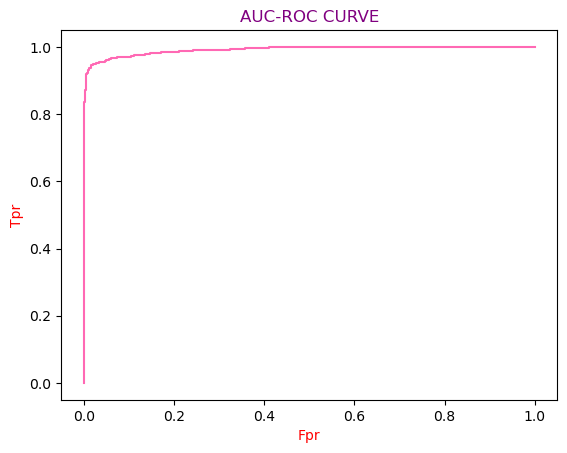

In [153]:
fpr,tpr,threshold=roc_curve(nsy_test,df1.iloc[:,1])
plt.plot(fpr,tpr,color="hotpink")
plt.xlabel("Fpr",color="red")
plt.ylabel("Tpr",color="red")
plt.title("AUC-ROC CURVE",color="purple")
plt.show()

# AUC_ROC CURVE CONCLUSION:
A high roc auc score indicated that the binary classification model is doing an excellent job of distinguishing between 
positive and negative instances.
In conclusion,a ROC AUC score of 0.95 suggests that the model is performing very well and well suited for the classification.

# COMPARISON OF ALL MODELS

In [154]:
display(Basemodel_final,smote_final,FINAL)

,basemodel name,accuracy,precision,recall,f1score
0,LG,94.520548,0.000000,0.000000,0.000000
1,DT,90.215264,0.133333,0.142857,0.137931
2,RF,94.324853,0.000000,0.000000,0.000000
3,KNN,94.520548,0.000000,0.000000,0.000000
4,SVM,94.520548,0.000000,0.000000,0.000000
5,NB,82.191781,0.161290,0.535714,0.247934
6,XGB,94.129159,0.000000,0.000000,0.000000


,smote_model name,accuracy,precision,recall,f1score
0,LG,79.691517,0.788520,0.808884,0.798572
1,DT,90.951157,0.904082,0.915289,0.909651
2,RF,94.395887,0.928215,0.961777,0.944698
3,SVM,76.760925,0.734545,0.834711,0.781431
4,KNN,85.552699,0.784590,0.978306,0.870805
5,NB,72.750643,0.708175,0.769628,0.737624
6,XGB,95.732648,0.951070,0.963843,0.957414


,final_model name,accuracy,precision,recall,f1score
0,LG,77.480720,0.740634,0.821086,0.778788
1,DT,90.848329,0.885512,0.930777,0.907580
2,RF,93.161954,0.903808,0.960596,0.931337
3,SVM,76.760925,0.717995,0.854100,0.780156
4,KNN,85.295630,0.777400,0.974441,0.864839
5,NB,68.534704,0.659824,0.718850,0.688073
6,XGB,95.475578,0.949314,0.957401,0.953340


# CONCLUSION:
After solving class imbalance issue ,outlier treatment and  feature selection, the best model for this data set is XGBoost compared to others with better Accuracy,Precision,Recall and F1 score.

# CROSS VALIDATION

# K-FOLD

In [155]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import  accuracy_score,make_scorer
import xgboost as xgb

In [156]:
model=xgb.XGBClassifier()
num_folds=5
kf=KFold(n_splits=num_folds)
scores=cross_val_score(model,newx,y_smote,cv=kf,scoring="accuracy")

In [157]:
for fold,score in enumerate(scores):
    print(f"Fold{fold+1}:Accuracy={score:.2f}")

Fold1:Accuracy=0.89
Fold2:Accuracy=0.91
Fold3:Accuracy=0.96
Fold4:Accuracy=0.97
Fold5:Accuracy=0.97


In [158]:
print(f"Mean Accuracy={scores.mean():.2f}")

Mean Accuracy=0.94


In [159]:
from sklearn.model_selection import cross_val_predict
predicted_labels=cross_val_predict(model,newx,y_smote,cv=5)

In [160]:
precision=precision_score(y_smote,predicted_labels)
recall=recall_score(y_smote,predicted_labels)
f1=f1_score(y_smote,predicted_labels)
accuracy=accuracy_score(y_smote,predicted_labels)

In [161]:
l1=[accuracy]
l2=[precision]
l3=[recall]
l4=[f1]

In [162]:
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.95
Recall: 0.95
F1-score: 0.95


In [163]:
cross_val=pd.DataFrame({"ModelName":"KFold","Accuracy":l1,"Precision":l2,"Recall":l3,"F1-score":l4})
cross_val                        

,ModelName,Accuracy,Precision,Recall,F1-score
0,KFold,0.951965,0.953177,0.950627,0.9519


# CONCLUSION:
After this cross validation, the accuracy,precision,recall,f1score are good.
we can conclude that the model is accurate and reliable in making predictions and it is likely a
good choice for the problem to be solved.